In [ ]:
import os
import sys

#import heuristic model files

hm_files_path = os.path.join(os.path.dirname(os.getcwd()), 'Heuristic_model')
print(hm_files_path)

if hm_files_path in sys.path:
    pass
else:
    sys.path.append(hm_files_path)


In [1]:
from Parser import parse_frames
from scipy.signal import medfilt
from Functions import find_extremas, filter_extremas, detect_side, analyse_each_rep
from JointAngles import JointAngles
import numpy as np
import math
import glob
import os
import itertools
import pickle
import matplotlib.pyplot as plt

Starting...
Keypoints from folder: front_raise
Detected arm: right

----------------------------Filtering minimas-------------------------------------
------------------------------------------------------------------------------------------


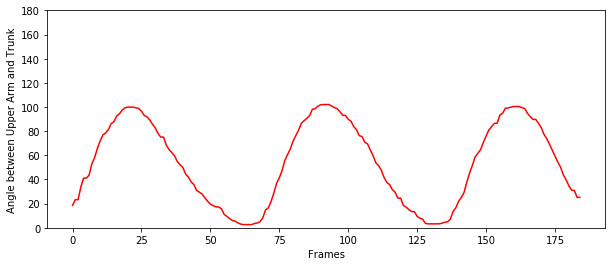

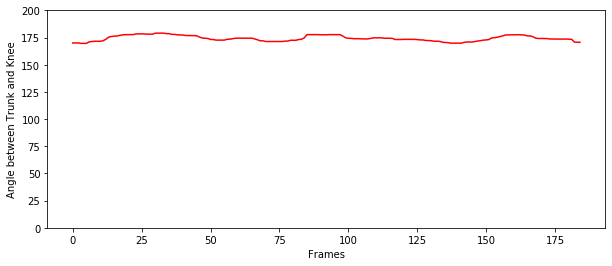

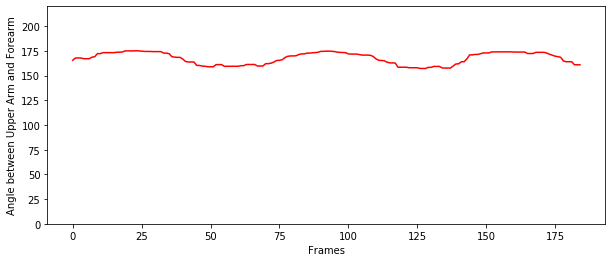

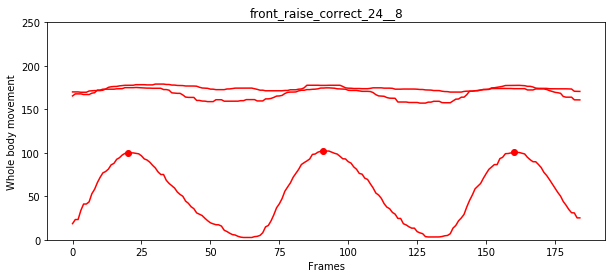

Number of reps performed: 3

Repetition: 1

Starting position upper arm forearm angle: 165.42063523236087
Starting position upper arm trunk angle: 18.57997695528021
Starting position trunk knee angle: 170.02374817476397

Maximum angle between upper arm and forearm: 175.1140277324097
Maximum angle between upper arm and trunk: 99.91242467446726
Maximum angle between trunk and knee: 179.03736921186731
Minimum angle between upper arm trunk: 2.6617995462924195
Minimum angle between trunk and knee: 169.6367896805858
Minimum angle between upper arm and forearm: 158.87305113338712

Finishing position upper arm forearm angle: 159.96112285070532
Finishing  position upper arm trunk angle: 2.6617995462924195
Finishing  position trunk knee angle: 174.48146488574886

Repetition: 2

Starting position upper arm forearm angle: 161.19401153354
Starting position upper arm trunk angle: 2.6617995462924195
Starting position trunk knee angle: 174.48146488574886

Maximum angle between upper arm and forearm: 1

In [2]:
# modify this path for other videos 
# input_folder = "/home/aleko/Documents/Projects/IndividualProject/bicepvid"
#input_folder = "C:\\Users\\kvash\\Documents\\GitHub\\IndividualProject\\keypoints_for_all\\front_raise"
input_folder = "C:\\Users\\kvash\\Documents\\GitHub\\IndividualProject\\keypoints_test\\front_raise"
#input_folder = 'C:\\Users\\ak5u16\\Desktop\\IndividualProject\\keypoints_for_all\\front_raise'
folder_paths = glob.glob(os.path.join(input_folder, 'front_ra*'))     

min_upper_arm_forearm = [] 
max_upper_arm_forearm = []
max_upper_arm_trunk = []
min_upper_arm_trunk = []
min_trunk_knee = []
max_trunk_knee = []


for folder in folder_paths:
    print("Starting..." + "\nKeypoints from folder: " + os.path.basename(folder))
    video_name = os.path.basename(folder)
    frame_poses = parse_frames(folder)
    
    joint_angles = JointAngles('front_raise', frame_poses)
    print('Detected arm: ' + joint_angles.side)

    upArm_trunk_angles = np.array(joint_angles.upArm_trunk_angles)
    upArm_trunk_angles_filtered = medfilt(medfilt(upArm_trunk_angles, 5), 5)
    
   
    upArm_forearm_angles = np.array(joint_angles.upArm_forearm_angles)
    upArm_forearm_angles_filtered = medfilt(medfilt(upArm_forearm_angles, 5), 5)
    
    trunk_knee_angles = np.array(joint_angles.trunk_knee_angles)
    trunk_knee_angles_filtered = medfilt(medfilt(trunk_knee_angles, 5), 5)
    
    # Find upper arm and trunk maximum angles to detect wrong form 
    upArm_trunk_maximas = find_extremas(upArm_trunk_angles_filtered)
    upArm_trunk_maximas = filter_extremas(upArm_trunk_angles_filtered, upArm_trunk_maximas)
    indexesmax1 = np.array([np.argwhere(upArm_trunk_angles_filtered == maxima)[0][0] for maxima in upArm_trunk_maximas])
    
    print('\n----------------------------Filtering minimas-------------------------------------')
    upArm_trunk_minimas = find_extremas(upArm_trunk_angles_filtered, maxima=False)
    upArm_trunk_minimas = filter_extremas(upArm_trunk_angles_filtered, upArm_trunk_minimas, maxima=False)
    indexesmin2 = np.array([np.argwhere(upArm_trunk_angles_filtered == minima)[0][0] for minima in upArm_trunk_minimas])
  
    # print("Largest angles between upper arm and trunk: " + str(upArm_trunk_maximas))

    # Find trunk and knee maximum angles to detect wrong form 
    trunk_knee_maximas = find_extremas(trunk_knee_angles_filtered)
    trunk_knee_maximas = filter_extremas(trunk_knee_angles_filtered, trunk_knee_maximas)
    indexesmax2 = np.array([np.argwhere(trunk_knee_angles_filtered == maxima)[0][0] for maxima in trunk_knee_maximas])
   
    # print("Largest angles between trunk and knee: " + str(trunk_knee_maximas))

    # Count repetitions
    upArm_forearm_maximas = find_extremas(upArm_forearm_angles_filtered)  
    upArm_forearm_maximas = filter_extremas(upArm_forearm_angles_filtered, upArm_forearm_maximas)
    indexesmax3 = np.array([np.argwhere(upArm_forearm_angles_filtered == maxima)[0][0] for maxima in upArm_forearm_maximas])
   
    # print("Number of maxima points between Upper Arm and Forearm: " + str(upArm_forearm_maximas.size))
    # print(upArm_forearm_maximas)
    
    # Find upper arm and forearm minimum points to count reps 
    upArm_forearm_minimas = find_extremas(upArm_forearm_angles_filtered, maxima=False)
    upArm_forearm_minimas = filter_extremas(upArm_forearm_angles_filtered, upArm_forearm_minimas, maxima=False)
    indexesmin = np.array([np.argwhere(upArm_forearm_angles_filtered == minima)[0][0] for minima in upArm_forearm_minimas])
    #print("\nSize of minima array: " + str(upArm_forearm_minimas.size))
    print('-'*90)
    
   
    # Plot 1
    plt.figure(figsize=(10,4))
    #plt.scatter(np.arange(upArm_trunk_angles.shape[0]), upArm_trunk_angles, alpha=0.5)
    plt.plot(np.arange(upArm_trunk_angles_filtered.shape[0]), upArm_trunk_angles_filtered, c='r', alpha=1)
    #plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Angle between Upper Arm and Trunk')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,180)
    
    # Annontate extrema points
    #plt.plot(indexesmax1, upArm_trunk_angles_filtered[indexesmax1], 'ks')
    #plt.plot(indexesmin2, upArm_trunk_angles_filtered[indexesmin2], 'bo')
    plt.show()
    
    # Plot 2
    plt.figure(figsize=(10,4))
    #plt.scatter(np.arange(trunk_knee_angles.shape[0]), trunk_knee_angles, alpha=0.5)
    plt.plot(np.arange(trunk_knee_angles_filtered.shape[0]), trunk_knee_angles_filtered, c='r', alpha=1)
    #plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Angle between Trunk and Knee')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0, 200)
    
    # Annontate maxima points
    #plt.plot(indexesmax2, trunk_knee_angles_filtered[indexesmax2], 'ks')
    plt.show()

    # Plot 3
    plt.figure(figsize=(10,4))
    #plt.scatter(np.arange(upArm_forearm_angles.shape[0]), upArm_forearm_angles, alpha=0.5)
    plt.plot(np.arange(upArm_forearm_angles_filtered.shape[0]), upArm_forearm_angles_filtered, c='r', alpha=1)
    #plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Angle between Upper Arm and Forearm')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,220) 
    
    # Annotate minima apoints on the graph   
    #max_points = upArm_forearm_angles_filtered[indexesmax3]
    #min_points = upArm_forearm_angles_filtered[indexesmin]
    #plt.plot(indexesmin, min_points, 'bo')
    #plt.plot(indexesmax3, max_points, 'ks')

    """
        # Annotate local maximas
        for maxp, indx in zip(max_points, indexesmax3):
            plt.annotate('local max', xy=(indx, maxp), xytext=(indx, maxp+25),
                    arrowprops=dict(facecolor='black', shrink=0.05))

        # Annotate local minimas
        for minp, indx in zip(min_points, indexesmin):
            plt.annotate('local min', xy=(indx, minp), xytext=(indx, minp-35),
                    arrowprops=dict(facecolor='black', shrink=0.05))     
    """
    plt.show()

    # Plot 4
    plt.figure(figsize=(10,4))
    plt.plot(np.arange(upArm_forearm_angles_filtered.shape[0]), upArm_forearm_angles_filtered, c='r', alpha=1)
    plt.plot(np.arange(upArm_trunk_angles_filtered.shape[0]), upArm_trunk_angles_filtered, c='r', alpha=1)
    plt.plot(np.arange(trunk_knee_angles_filtered.shape[0]), trunk_knee_angles_filtered, c='r', alpha=1)
    plt.title("front_raise_correct_24__8") ####
    plt.xlabel('Frames')
    plt.ylabel('Whole body movement')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,250) 
    # Annotate minima apoints      
    #plt.plot(indexesmin, upArm_forearm_angles_filtered[indexesmin], 'ro')
    #plt.plot(indexesmin2, upArm_trunk_angles_filtered[indexesmin2], 'ko')
    plt.plot(indexesmax1, upArm_trunk_angles_filtered[indexesmax1], 'ro')
    #plt.plot(indexesmax2, trunk_knee_angles_filtered[indexesmax2], 'ks')
    #plt.plot(indexesmax3, upArm_forearm_angles_filtered[indexesmax3], 'ko')
    
    plt.show()
   
    
    # Each rep analysis
    # local minimums for upper arm and forearm are min angles in each rep
    
    """
    min_upper_arm_forearm1, max_upper_arm_forearm1, min_upper_arm_trunk1, max_upper_arm_trunk1, min_trunk_knee1, max_trunk_knee1 = analyse_each_rep(exercise='front_raise', mode='thresholds', 
                                                                                                                                                     extremas1=upArm_trunk_minimas, 
                                                                                                                                                     uf_angles1=upArm_forearm_angles_filtered, 
                                                                                                                                                     ut_angles1=upArm_trunk_angles_filtered, 
                                                                                                                                                     tk_angles1=trunk_knee_angles_filtered)

    
    """
    analyse_each_rep(exercise='front_raise', mode='analysis', extremas1=upArm_trunk_minimas,
                     uf_angles1=upArm_forearm_angles_filtered, ut_angles1=upArm_trunk_angles_filtered,
                     tk_angles1=trunk_knee_angles_filtered)
    """
   
    min_upper_arm_forearm = min_upper_arm_forearm + min_upper_arm_forearm1
    max_upper_arm_forearm = max_upper_arm_forearm + max_upper_arm_forearm1
    min_upper_arm_trunk = min_upper_arm_trunk + min_upper_arm_trunk1
    max_upper_arm_trunk = max_upper_arm_trunk + max_upper_arm_trunk1
    min_trunk_knee = min_trunk_knee + min_trunk_knee1
    max_trunk_knee = max_trunk_knee + max_trunk_knee1
    
    
    print('\n' + '='*120 + '\n')

    
#print('Maximum in minimum Upper Arm Forearm threshold: ' + str(min(min_upper_arm_forearm)))
#print('Maximum in maximum Upper Arm Forearm threshold: ' + str(max(max_upper_arm_forearm)))
#print('Maximum in minimum Upper Arm Trunk angles: ' + str(max(min_upper_arm_trunk)))
#print('Minimum in minimum Upper Arm Trunk angles: ' + str(min(min_upper_arm_trunk)))
#print('Maximum in maximum Upper Arm Trunk angles: ' + str(max(max_upper_arm_trunk)))
#print('Minimum in maximum Upper Arm Trunk angles: ' + str(min(max_upper_arm_trunk)))
print('Minimum in minimum trunk Knee threshold: ' + str(min(min_trunk_knee)))
print('Maximum in maximum Trunk Knee threshold: ' + str(max(max_trunk_knee)))
print('Maximum in minimum Trunk Knee threshold: ' + str(max(min_trunk_knee)))
print('Minimum in maximum Trunk Knee threshold: ' + str(min(max_trunk_knee)))
"""

In [16]:
max_trunk_knee


[186.27507740110858,
 186.348268068715,
 185.6845108755224,
 186.290210880131,
 184.81708642482215,
 186.1929105913961,
 185.72172626276236,
 188.2140057493319,
 184.8633667860023,
 187.52310457091457,
 187.64800356966165,
 189.3972227645613,
 187.98131732626592,
 190.2113030086236,
 187.886851349078,
 188.55018778451287,
 190.0976028076721,
 189.7129262700079,
 189.2679194238086,
 189.24816386997398,
 190.8000432817493,
 191.3781452462863,
 191.26930257203284,
 190.94395635779662,
 193.3847600178989,
 191.4647948051894,
 191.58839958526724,
 192.19577307418734,
 190.87911304398972,
 192.37597566345957,
 190.81948697201628,
 190.75827787944257,
 191.84181698135552,
 190.89044919363434,
 190.4621120728943,
 190.59592585160414,
 188.46277949896935,
 189.70215547553101,
 180.12800551513945,
 180.7329476240787,
 180.14560371405736,
 178.91847994610373,
 180.01623477684632,
 179.15267390416156,
 179.70042641753673,
 178.98483320948034,
 178.24364647917716,
 179.9746690320186,
 177.831242759